In [44]:
import tensorflow as tf

In [138]:
w = tf.Variable(tf.random.normal((1, 1)), name='w')
b = tf.Variable(tf.zeros(1, dtype=tf.float32), name='b')
x = tf.constant(value=tf.random.normal((100, 1)))
noise = tf.random.normal((100, 1))
y = tf.constant(value=x * noise * 100 + tf.random.normal((1,)))
a = 0.1
e = 0.00001
prev_loss = e

for epoch in range(1000):
    with tf.GradientTape(persistent=True) as tape:
        y_hat = x @ w + b
        loss = tf.reduce_mean(tf.square(y_hat - y))
    if prev_loss - loss.numpy() < e and epoch > 0:
        break
    prev_loss = loss.numpy()
    w.assign_sub(a * tape.gradient(loss, w))
    b.assign_sub(a * tape.gradient(loss, b))
print(epoch, w.numpy(), b.numpy(), prev_loss)

23 [[6.164452]] [-7.617326] 8272.104


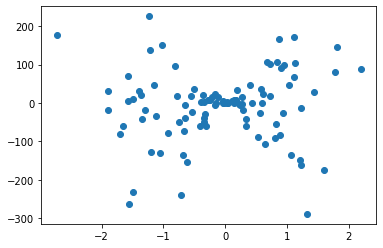

In [139]:
import matplotlib.pyplot as plt

plt.scatter(x, y)